# Assignment 2 - Meteor Classification


## 1.0 Project Overview

### 1.0.1 Project Description
As an open-ended data assessment, this analysis will review and build a model to analyze a binary classification problem. With this model, we can make some insights based on the data available, while confirming the accuracy of results.

In this project, we will look over NASA observations for Near Earth Objects (NEO's). These are bodies in space that have a trajectory somewhere around earth and are documented by NASA to verify the potential hazard. This classification exercise will look at the different variables relating to these objects (diameter, distance from earth, velocity, etc.) using data from 1910-2024 (with almost ~34,000 entries). 

### 1.0.2 Project Statement 
With many NEO's coming within Earth's orbit, we will be using previous historical data to analyze whether or not a potential object would be considered hazardous or non-hazardous using binary classification.

## 1.1 Project Setup

### 1.1.1 Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1.2 Importing the Dataset
Data sourced from "NASA | Nearest Earth Objects (1910-2024)" by IVANSHER

https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024

In [9]:
# Import dataset
data = pd.read_csv("nearest-earth-objects(1910-2024).csv")

### 1.1.3 Initial Review of the Dataset

In [11]:
# Review of some of the existing data
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


We can see from this data that there are a few columns that are irrelevant (neo_id, name, and orbiting_body). There is a possibility later on to perform a full review on whether or not there are repeated NEO's (from the first two columns) that've cycled multiple times around earth. Whether or not they have been repeated hazards/non-hazards could be relevant for future action.

In [13]:
# Using pandas to create a dataframe for some preliminary analysis
dataFrame = pd.DataFrame(data)
headers = dataFrame.columns

# Find duplicates in the first two relevant columns
neo_IDs = dataFrame[headers[0]].value_counts()
names = dataFrame[headers[1]].value_counts()

# Filter for values that appear more than once
repeating_neo_IDs = neo_IDs[neo_IDs > 1]
repeating_names = names[names > 1]
print("In the first column, we find the amount of duplicate reports to be ", len(repeating_neo_IDs), 
      " while in the second column to be ", len(repeating_names),".")

In the first column, we find the amount of duplicate reports to be  24147  while in the second column to be  24147 .


In [14]:
print(repeating_neo_IDs, '\n')
print(repeating_names)

neo_id
2277810     211
2469219     197
3678630     192
3771633     186
54353620    169
           ... 
54307430      2
3277571       2
54376678      2
54442111      2
3565393       2
Name: count, Length: 24147, dtype: int64 

name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
                                ... 
(2022 SY9)                         2
(2005 JV1)                         2
(2023 PH)                          2
(2024 JY16)                        2
(2011 JU10)                        2
Name: count, Length: 24147, dtype: int64


Based on the shear amount of repeating NEO's, the process of analyzing the data may be quite time consuming. This would be an interesting feat. to undertake nonetheless to see whether or not approaching NEO's are becoming more and more dangerous.

Here we can already see that  2277810 (2006 FV35) appears to have 211 encounters as such, showing that this data could be important to the nature of tracking for harmful objects.

## 1.2 Handling Specific Datatypes

### 1.2.1 Converting Categorical to Numerical Data

No one-hot encoding is required for the input. 
The output appears to be set as True and False, which also means we won't need to modify the output.

### 1.2.1 Removing Unnecessary Data

Keeping: absolute_magnitude, estimated_diameter_min, estimated_diameter_max, relative_velocity, miss_distance, and is_hazardous
Removing: neo_id, name, and orbiting_body

In [21]:
# Removal and check for the data
data = data.drop(['neo_id', 'name', 'orbiting_body'], axis=1)
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


### 1.2.3 Check for Missing Data

In [23]:
# Major properties of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


Based on this information, it appears that there are a few data points that are missing, so we will remove them.

In [25]:
# Removal of missing rows (source chatGTP)
data.dropna(subset=['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max'], inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338171 non-null  float64
 4   miss_distance           338171 non-null  float64
 5   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 15.8 MB


### 1.2.4 Check for Outliers

We have a minimum and maximum estimated diameter. Instead of assessing these individually, we will combine them and drop the original columns now that missing data is removed.

In [28]:
# Averaging and dropping the min/max
data['estimated_diameter_avg'] = (data['estimated_diameter_min'] + data['estimated_diameter_max']) / 2
data = data.drop(['estimated_diameter_min', 'estimated_diameter_max'], axis=1)
data.head()

,absolute_magnitude,relative_velocity,miss_distance,is_hazardous,estimated_diameter_avg
0,19.14,71745.401048,5.814362e+07,False,0.639061
1,18.50,109949.757148,5.580105e+07,True,0.858109
2,21.45,24865.506798,6.720689e+07,False,0.220568
3,20.63,78890.076805,3.039644e+07,False,0.321768
4,22.70,56036.519484,6.311863e+07,False,0.124035


In [29]:
# Review to check for outliers
data.describe()

,absolute_magnitude,relative_velocity,miss_distance,estimated_diameter_avg
count,338171.000000,338171.000000,3.381710e+05,338171.000000
mean,22.932525,51060.017994,4.153547e+07,0.255345
std,2.911216,26399.922830,2.077411e+07,0.507877
min,9.250000,203.346433,6.745533e+03,0.000827
25%,20.740000,30710.626399,2.494495e+07,0.041072
50%,22.800000,47557.046397,4.332724e+07,0.118452
75%,25.100000,66673.223798,5.933961e+07,0.305874
max,33.580000,291781.106613,7.479865e+07,60.749487


In [30]:
# Now with columns removed, want to consider only the viable columns
dataFrame = pd.DataFrame(data)
headers = dataFrame.columns

# Running through each variable to check for possible outliers, outputting resultant from Z-score
for head in headers:
    mean = dataFrame[head].mean()
    std = dataFrame[head].std()
    min = dataFrame[head].min()
    max = dataFrame[head].max()
    z_min = round((min-mean)/std,2)
    z_max = round((max-mean)/std,2)

    # Run through verification for any possible outliers
    if z_min > 3 or z_max > 3:
        if z_min > 3 and z_min > 3:
            print("For the ", head, "both the upper and lower limits exceed the Z-score of 3, there are outliers on both ends.")
            print("The Z-scores are: ", z_min, " and ", z_max, ".")
        elif z_min < -3:
            print("For the ", head, "the lower limit exceeds the Z-score of -3. There are outliers to consider.")
            print("The Z-score is: ", z_min, ".")
        else:
            print("For the ", head, "the upper limit exceeds the Z-score of 3. There are outliers to consider.")
            print("The Z-score is: ", z_max, ".")
    else:
        print("For the ", head, "there are no outliers to consider outside of the Z-score of +/-3.")

For the  absolute_magnitude the lower limit exceeds the Z-score of -3. There are outliers to consider.
The Z-score is:  -4.7 .
For the  relative_velocity the upper limit exceeds the Z-score of 3. There are outliers to consider.
The Z-score is:  9.12 .
For the  miss_distance there are no outliers to consider outside of the Z-score of +/-3.
For the  is_hazardous there are no outliers to consider outside of the Z-score of +/-3.
For the  estimated_diameter_avg the upper limit exceeds the Z-score of 3. There are outliers to consider.
The Z-score is:  119.11 .


We can remove the outliers later, but for now just take a look at how the data is.

## 1.3 Exploring the Data

### 1.3.1 Correlation Matrix

is_hazardous              1.000000
relative_velocity         0.187034
estimated_diameter_avg    0.164841
miss_distance            -0.006542
absolute_magnitude       -0.343996
Name: is_hazardous, dtype: float64

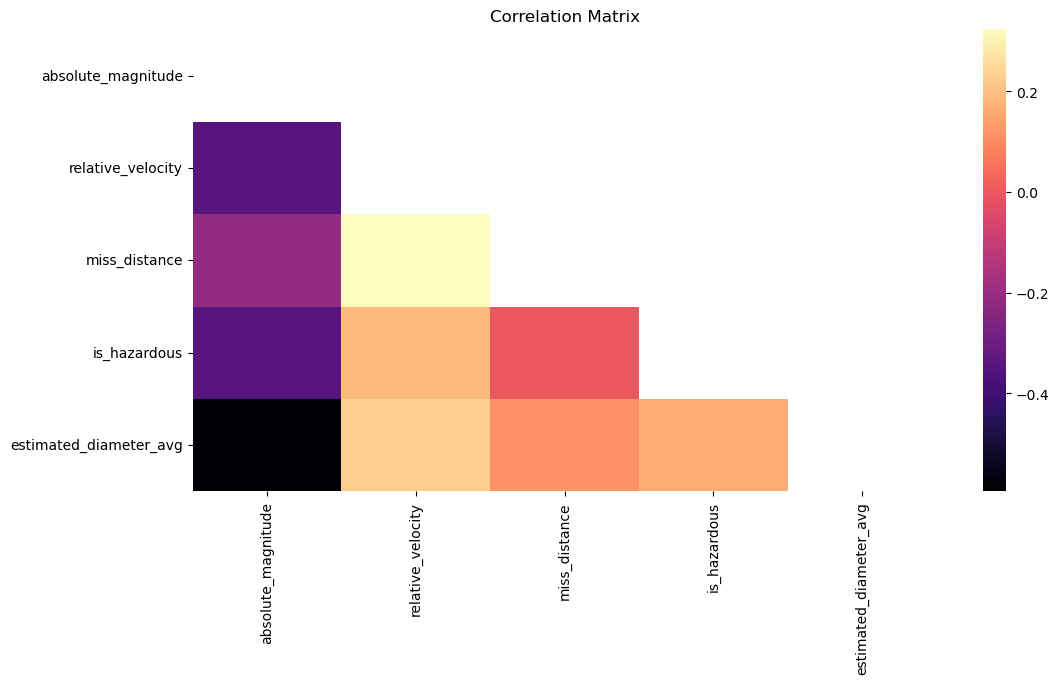

In [34]:
# Generating the correlation matrix
correlation_matrix = data.corr()

# Visualization of the correlation matrix 
from seaborn import heatmap

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(correlation_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column
correlation_matrix['is_hazardous'].sort_values(ascending=False)  

From this correlation matrix, we're finding fairly low correlation independently of each variable.

### 1.3.2 Data Visualization

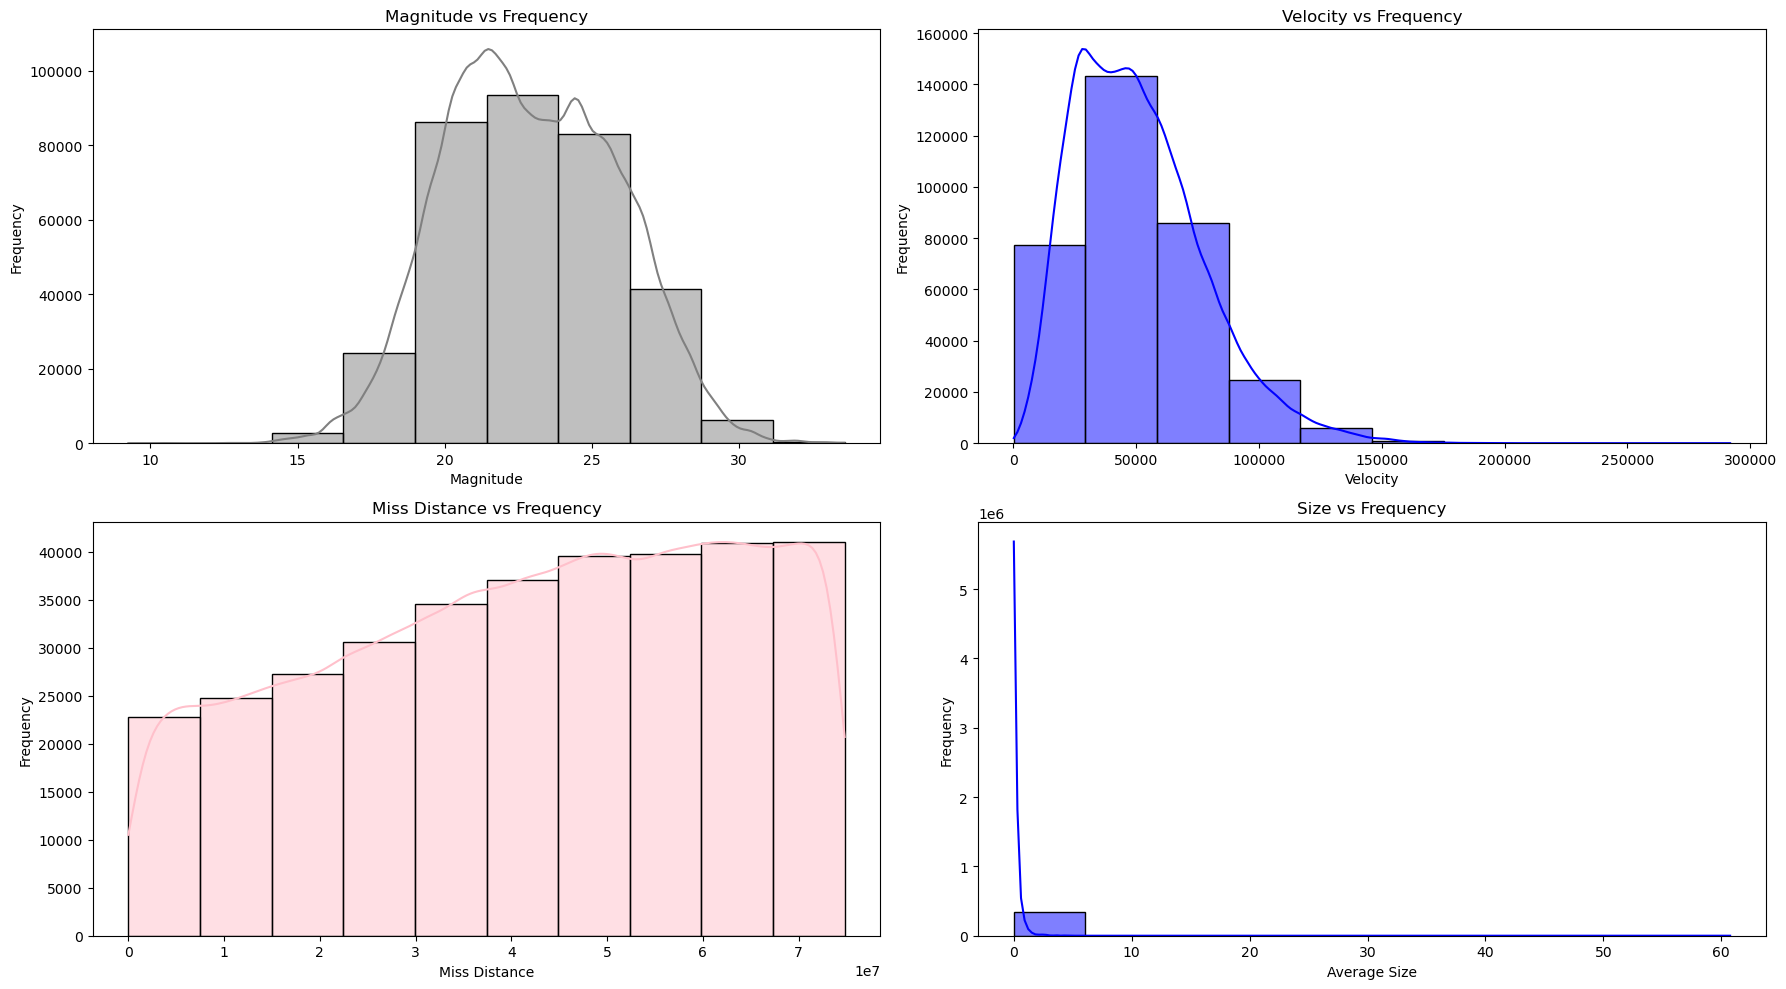

In [37]:
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot histogram for magnitude with a distribution curve
sns.histplot(data['absolute_magnitude'], bins=10, kde=True, ax=axes[0,0], color='gray', edgecolor='black')
axes[0,0].set_title('Magnitude vs Frequency')
axes[0,0].set_xlabel('Magnitude')
axes[0,0].set_ylabel('Frequency')

# Plot histogram for relative velocity with a distribution curve
sns.histplot(data['relative_velocity'], bins=10, kde=True, ax=axes[0,1], color='blue', edgecolor='black')
axes[0,1].set_title('Velocity vs Frequency')
axes[0,1].set_xlabel('Velocity')
axes[0,1].set_ylabel('Frequency')

# Plot histogram for miss distance with a distribution curve
sns.histplot(data['miss_distance'], bins=10, kde=True, ax=axes[1,0], color='pink', edgecolor='black')
axes[1,0].set_title('Miss Distance vs Frequency')
axes[1,0].set_xlabel('Miss Distance')
axes[1,0].set_ylabel('Frequency')

# Plot histogram for relative velocity with a distribution curve
sns.histplot(data['estimated_diameter_avg'], bins=10, kde=True, ax=axes[1,1], color='blue', edgecolor='black')
axes[1,1].set_title('Size vs Frequency')
axes[1,1].set_xlabel('Average Size')
axes[1,1].set_ylabel('Frequency')

# Add space between the plots
plt.tight_layout()
plt.show()

From the first plot in magnitude, we can see that generally a mid-range magnitude NEO tends to more frequently be a hazard. 
From the left-skewed velocity plot, we can tell that most of these NEOs are generally in the slower range.
From from the miss distance we generally see a right-skewed plot showing that the frequency of near-range NEOs are infrequent.
Finally we see that there are some significant outliers making the plot difficult to see in the sizes. We will address those later.

As the miss distance had the highest correlation, we can take a look at the estimated magnitude grouped with the hazard.

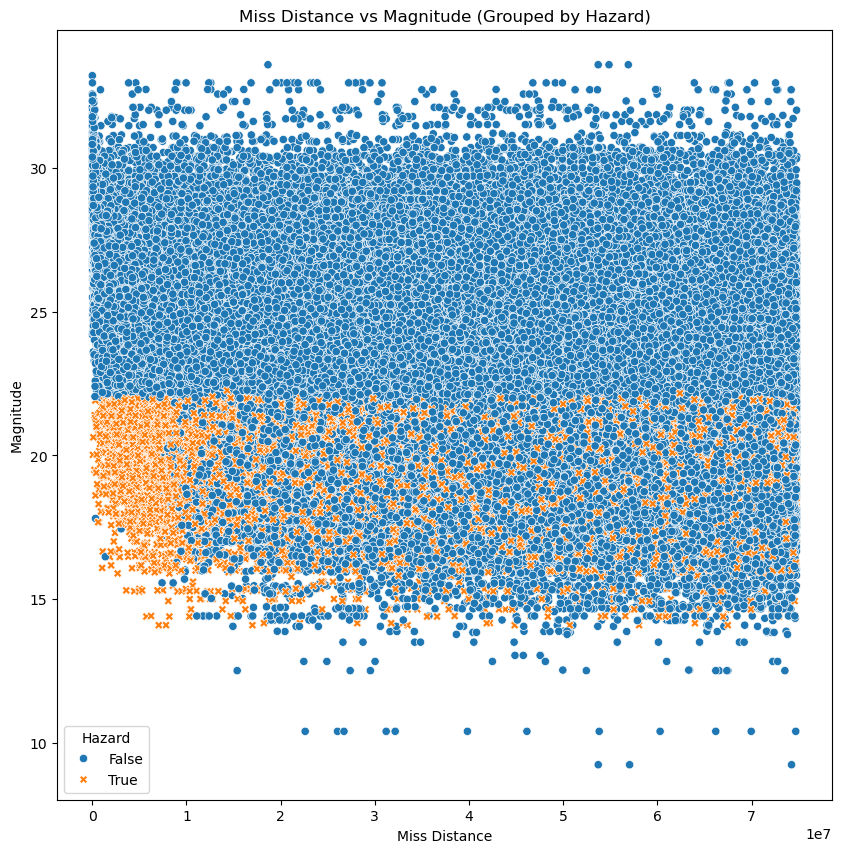

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='miss_distance', y='absolute_magnitude', hue='is_hazardous', data=data, style='is_hazardous')

# Adding labels and title
plt.xlabel('Miss Distance')
plt.ylabel('Magnitude')
plt.title('Miss Distance vs Magnitude (Grouped by Hazard)')
plt.legend(title='Hazard', loc="best")
plt.show()

In this plot, we are seeing that there are more frequent mid-range magnitudes at low miss distances as hazardous.

## 1.4 Data Pre-Processing

### 1.4.2 Separation of Input/Output

Now that we have relatively cleaned data (outliers will be dealt with shortly), we can begin separating the data for inputs and output.

In [45]:
X = data.drop('is_hazardous', axis = 1)
y = data['is_hazardous']

### 1.4.3 Splitting the Test/Training Sets

In [47]:
from sklearn.model_selection import train_test_split

# Split into training and test data (80/20 split respectively)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Due to the time for processing of the nonlinear SVM, we will reduce the test size
X_train_NLSVM, X_test_NLSVM, y_train_NLSVM, y_test_NLSVM = train_test_split(X, y, train_size = 0.01, random_state=1)

# Illustrating number of samples
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")

Training data size: 270536 samples
Test data size: 67635 samples


### 1.4.4 Removal of Outliers

We've already seen that there are quite a few outliers from the Z score previously indicated. Now lets visualize this.

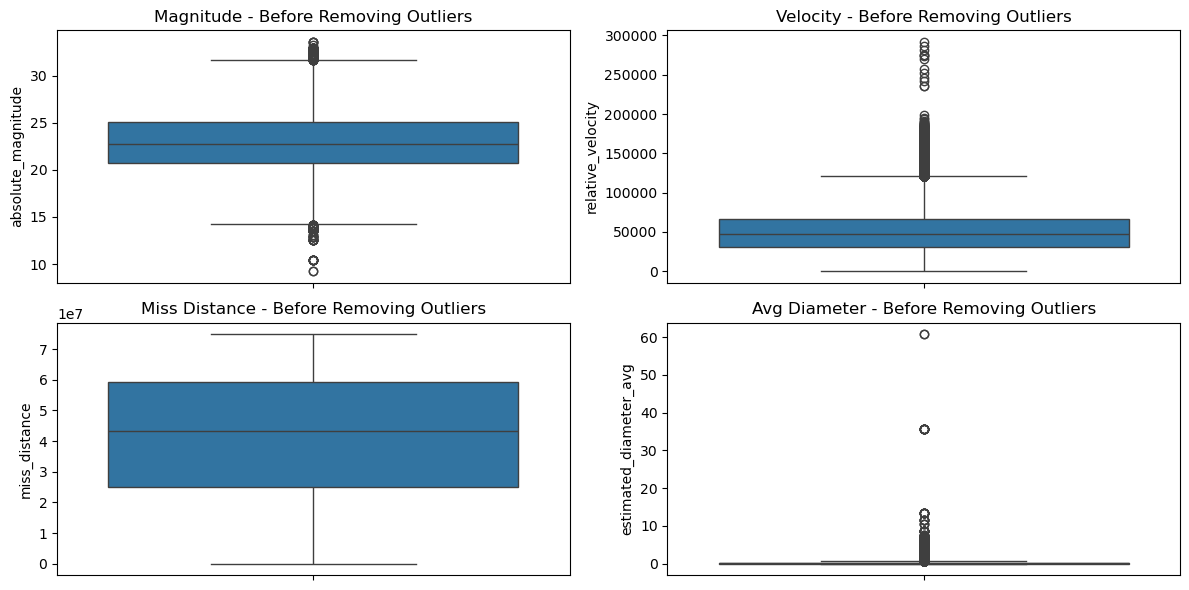

In [50]:
plt.figure(figsize=(12, 6))

# Box plot for magnitude
plt.subplot(2, 2, 1)
sns.boxplot(y=X_train['absolute_magnitude'])
plt.title('Magnitude - Before Removing Outliers')

# Box plot for relative velocity
plt.subplot(2, 2, 2)
sns.boxplot(y=X_train['relative_velocity'])
plt.title('Velocity - Before Removing Outliers')

# Box plot for miss distance
plt.subplot(2, 2, 3)
sns.boxplot(y=X_train['miss_distance'])
plt.title('Miss Distance - Before Removing Outliers')

# Box plot for avg diameter
plt.subplot(2, 2, 4)
sns.boxplot(y=X_train['estimated_diameter_avg'])
plt.title('Avg Diameter - Before Removing Outliers')

plt.tight_layout()
plt.show()

Using the IQR method, we can remove data falling below/above 3 standard deviations from the mean.

In [52]:
from scipy import stats

# Function to remove outliers and corresponding rows from X and y (supported by chatGTP)
def remove_outliers_from_both_zscore(X, y, column, z_threshold=3):
    # Calculate the Z-scores of the specified column
    z_scores = stats.zscore(X[column])
    
    # Create a mask for rows where the Z-score is within the specified threshold
    mask = (z_scores <= z_threshold) & (z_scores >= -z_threshold)
    
    # Return the filtered X and y (rows without outliers)
    return X[mask], y[mask]

# Remove outliers from magnitude
X_train_clean, y_train_clean = remove_outliers_from_both_zscore(X_train, y_train, 'absolute_magnitude')
X_train_clean_NLSVM, y_train_clean_NLSVM = remove_outliers_from_both_zscore(X_train_NLSVM, y_train_NLSVM, 'absolute_magnitude')

# Remove outliers from relative velocity
X_train_clean, y_train_clean = remove_outliers_from_both_zscore(X_train_clean, y_train_clean, 'relative_velocity')
X_train_clean_NLSVM, y_train_clean_NLSVM = remove_outliers_from_both_zscore(X_train_clean_NLSVM, y_train_clean_NLSVM, 'relative_velocity')

# Remove outliers from miss distance
X_train_clean, y_train_clean = remove_outliers_from_both_zscore(X_train_clean, y_train_clean, 'miss_distance')
X_train_clean_NLSVM, y_train_clean_NLSVM = remove_outliers_from_both_zscore(X_train_clean_NLSVM, y_train_clean_NLSVM, 'miss_distance')

# Remove outliers from avg diameter
X_train_clean, y_train_clean = remove_outliers_from_both_zscore(X_train_clean, y_train_clean, 'estimated_diameter_avg')
X_train_clean_NLSVM, y_train_clean_NLSVM = remove_outliers_from_both_zscore(X_train_clean_NLSVM, y_train_clean_NLSVM, 'estimated_diameter_avg')

# Display the size of the cleaned data
print(f"Training data size after removing outliers: {X_train_clean.shape[0]} samples")



Training data size after removing outliers: 262811 samples


Now we can remake the plots

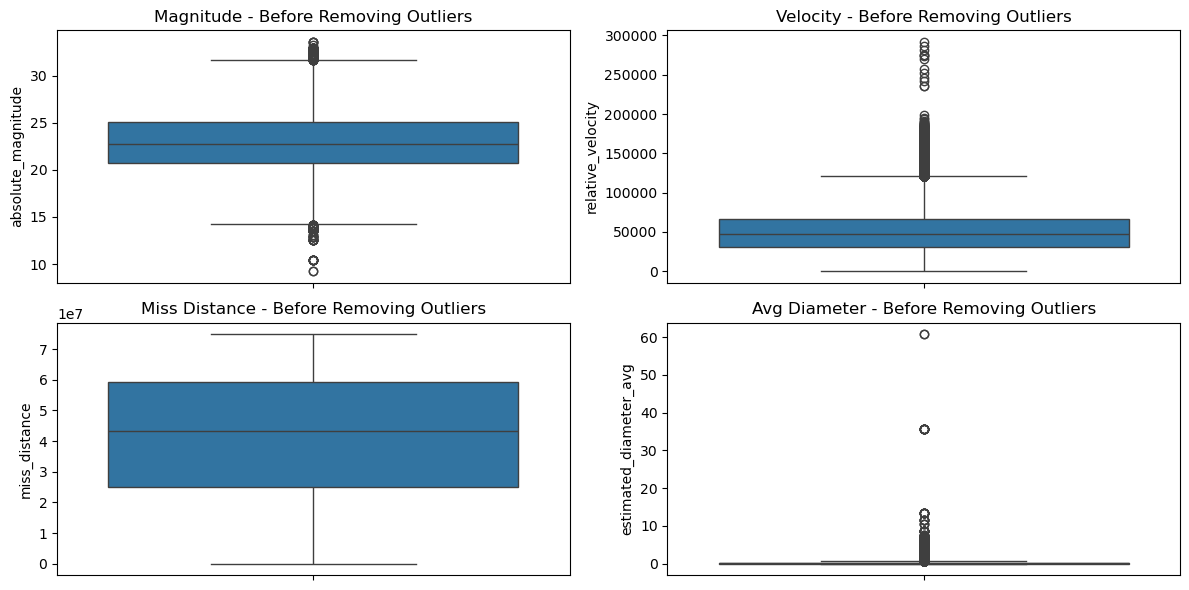

In [54]:
# Create box plots for Age and EstimatedSalary after removing outliers
plt.figure(figsize=(12, 6))

# Box plot for magnitude
plt.subplot(2, 2, 1)
sns.boxplot(y=X_train['absolute_magnitude'])
plt.title('Magnitude - Before Removing Outliers')

# Box plot for relative velocity
plt.subplot(2, 2, 2)
sns.boxplot(y=X_train['relative_velocity'])
plt.title('Velocity - Before Removing Outliers')

# Box plot for miss distance
plt.subplot(2, 2, 3)
sns.boxplot(y=X_train['miss_distance'])
plt.title('Miss Distance - Before Removing Outliers')

# Box plot for avg diameter
plt.subplot(2, 2, 4)
sns.boxplot(y=X_train['estimated_diameter_avg'])
plt.title('Avg Diameter - Before Removing Outliers')

plt.tight_layout()
plt.show()


As we've already gone through removing outliers, it is unnecessary to repeat the process.

### 1.4.5 Scaling the Data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

# For the nonlinear SVM
X_train_scaled_NLSVM = scaler.fit_transform(X_train_clean_NLSVM)
X_test_scaled_NLSVM = scaler.transform(X_test_NLSVM)

## 2.0 Machine Learning

### 2.0.1 Machine Learning Tools

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

Now that the libraries are imported, we can train the data (tweaks to the Linear and non-linear SVM with help from chatgtp to improve the speed of processing).

In [62]:
# Initialize the classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10), 
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Linear SVM": LinearSVC(max_iter=10000, random_state=42),
    "Nonlinear SVM": SVC(kernel='rbf', C=1e-5, gamma=1e-5)
}

# Dictionary to store accuracy results
accuracy_results = {}

# List to store
y_train_results = []
y_test_results = []

# Train and evaluate each model
for model_name, model in models.items():
    if model_name == "Nonlinear SVM":
        # Fit the model to the training data
        model.fit(X_train_scaled_NLSVM, y_train_clean_NLSVM)
        
        # Make predictions on the training and test data
        y_train_pred_NLSVM = model.predict(X_train_scaled_NLSVM)
        y_test_pred_NLSVM = model.predict(X_test_scaled_NLSVM)
        
        # Calculate the training and test accuracy
        train_accuracy = accuracy_score(y_train_clean_NLSVM, y_train_pred_NLSVM)
        test_accuracy = accuracy_score(y_test_NLSVM, y_test_pred_NLSVM)
    
        # Store teh new y values
        y_train_results.append(y_train_pred_NLSVM)
        y_test_results.append(y_test_pred_NLSVM)
        
        # Store the results in the dictionary
        accuracy_results[model_name] = {
            "Train Accuracy": train_accuracy * 100,
            "Test Accuracy": test_accuracy * 100
        }
        
        # Print the accuracy for each model
        print(f"{model_name}:")
        print(f"  Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"  Test Accuracy: {test_accuracy * 100:.2f}%\n")
    else:
        # Fit the model to the training data
        model.fit(X_train_scaled, y_train_clean)
        
        # Make predictions on the training and test data
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # Calculate the training and test accuracy
        train_accuracy = accuracy_score(y_train_clean, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
    
        # Store teh new y values
        y_train_results.append(y_train_pred)
        y_test_results.append(y_test_pred)
        
        # Store the results in the dictionary
        accuracy_results[model_name] = {
            "Train Accuracy": train_accuracy * 100,
            "Test Accuracy": test_accuracy * 100
        }
        
        # Print the accuracy for each model
        print(f"{model_name}:")
        print(f"  Training Accuracy: {train_accuracy * 100:.2f}%")
        print(f"  Test Accuracy: {test_accuracy * 100:.2f}%\n")

# Display accuracy results in a table
import pandas as pd
accuracy_df = pd.DataFrame(accuracy_results).T

accuracy_df

K-Nearest Neighbors:
  Training Accuracy: 90.49%
  Test Accuracy: 88.50%

Naive Bayes:
  Training Accuracy: 80.14%
  Test Accuracy: 79.11%

Decision Tree:
  Training Accuracy: 100.00%
  Test Accuracy: 88.75%



C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM:
  Training Accuracy: 87.74%
  Test Accuracy: 87.56%

Nonlinear SVM:
  Training Accuracy: 87.57%
  Test Accuracy: 87.24%



,Train Accuracy,Test Accuracy
K-Nearest Neighbors,90.494690,88.498558
Naive Bayes,80.139340,79.111407
Decision Tree,100.000000,88.745472
Linear SVM,87.736434,87.562652
Nonlinear SVM,87.568389,87.237373


Based on the speed of processing, had to make a few changes to speed up the process to the SVM methods, which in turn likely reduced their overall accuracies. Linear SVM takes quite a bit of time, requiring some further tuning, and found that with increasing the number of iterations from 100 to 10000 did not improve the accuracy significantly. The nonlinear SVM was taking upwards of 60 minutes with tuned parameters, at which point reducing the size of the training set was decided.

As we do not have the full amount of time to assess the fullest accuracies of the SVM methods, we were left with a lower model accuracy than desired. Nonetheless, these SVM methods exceeded the performance of Naive Bayes.

The best accuracy though was with the decision tree.

## 2.0.2 Confusion Matrix

Setting up the plotter for the confusion matrix while splitting the y data for the trained, tested, and each type of method.

In [66]:
# KNN
y_train_KNN = y_train_results[0]
y_test_KNN = y_test_results[0]

# Naive Bayes
y_train_NB = y_train_results[1]
y_test_NB = y_test_results[1]

# Decision Tree
y_train_DT = y_train_results[2]
y_test_DT = y_test_results[2]

# Linear SVM
y_train_LSVM = y_train_results[3]
y_test_LSVM = y_test_results[3]

# Nonlinear SVM
y_train_NLSVM_2 = y_train_results[4]
y_test_NLSVM_2 = y_test_results[4]

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    print("The accuracy of the confusion matrix to follow is ", round(accuracy_score(y_true, y_pred)*100,2), "%")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

## 2.1 K-NN
Nearest Neighbour Classification

The accuracy of the confusion matrix to follow is  90.49 %


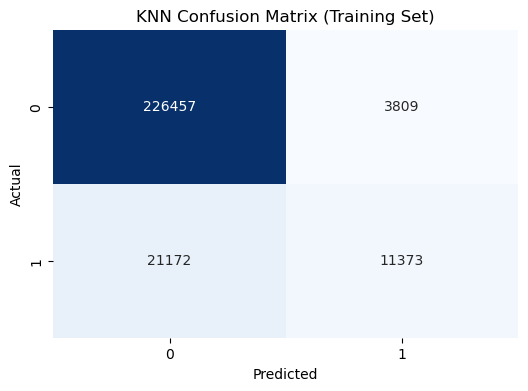

The accuracy of the confusion matrix to follow is  88.5 %


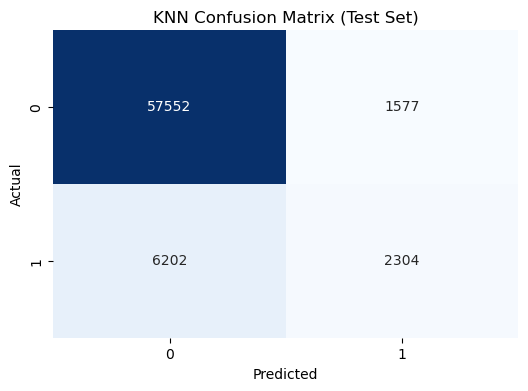

In [69]:
# Plot confusion matrix for training & test data
plot_confusion_matrix(y_train_clean, y_train_KNN, 'KNN Confusion Matrix (Training Set)')
plot_confusion_matrix(y_test, y_test_KNN, 'KNN Confusion Matrix (Test Set)')

## 2.2 Naive-Bayes
Feature Probability Classification

The accuracy of the confusion matrix to follow is  80.14 %


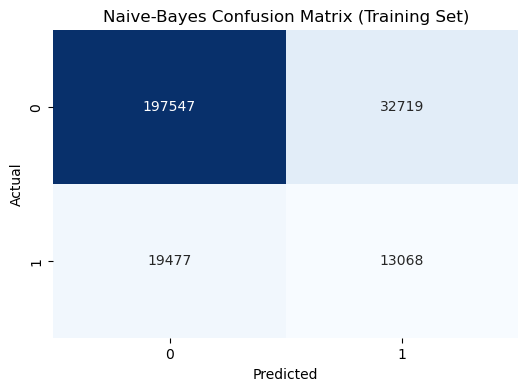

The accuracy of the confusion matrix to follow is  79.11 %


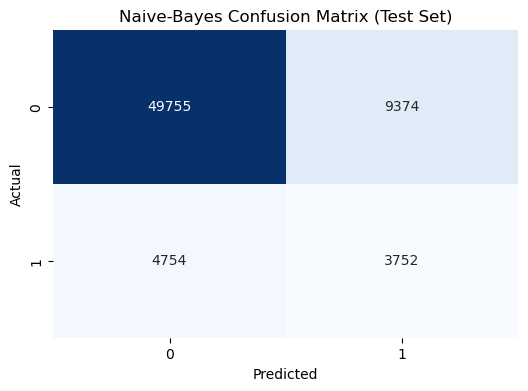

In [71]:
# Plot confusion matrix for training & test data
plot_confusion_matrix(y_train_clean, y_train_NB, 'Naive-Bayes Confusion Matrix (Training Set)')
plot_confusion_matrix(y_test, y_test_NB, 'Naive-Bayes Confusion Matrix (Test Set)')

## 2.3 Tree and Forest
Yes/No Question Classification

The accuracy of the confusion matrix to follow is  100.0 %


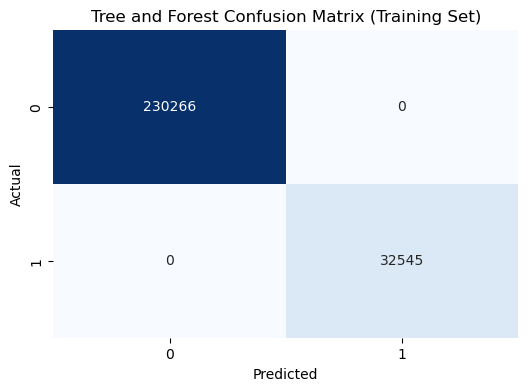

The accuracy of the confusion matrix to follow is  88.75 %


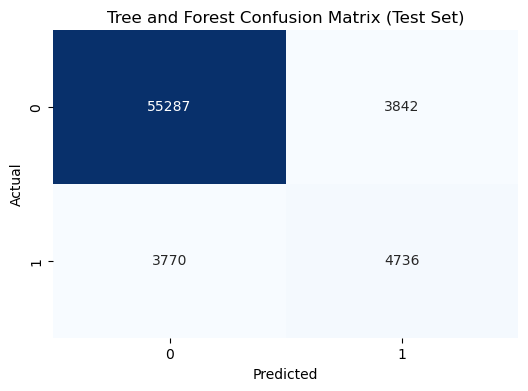

In [73]:
# Plot confusion matrix for training & test data
plot_confusion_matrix(y_train_clean, y_train_DT, 'Tree and Forest Confusion Matrix (Training Set)')
plot_confusion_matrix(y_test, y_test_DT, 'Tree and Forest Confusion Matrix (Test Set)')

## 2.4 SVM Linear
Grouping Classification

The accuracy of the confusion matrix to follow is  87.74 %


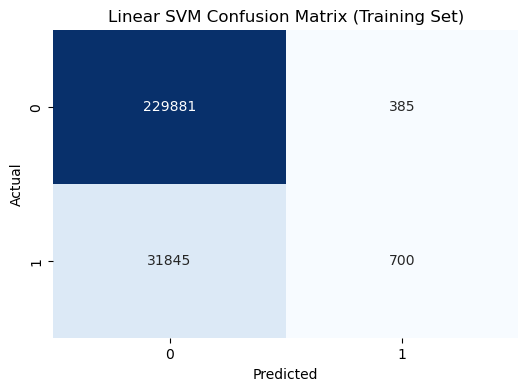

The accuracy of the confusion matrix to follow is  87.56 %


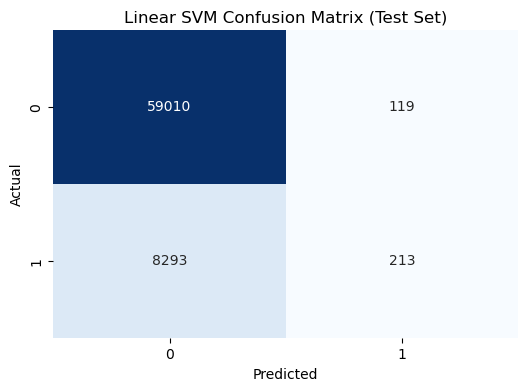

In [75]:
# Plot confusion matrix for training & test data
plot_confusion_matrix(y_train_clean, y_train_LSVM, 'Linear SVM Confusion Matrix (Training Set)')
plot_confusion_matrix(y_test, y_test_LSVM, 'Linear SVM Confusion Matrix (Test Set)')

## 2.5 SVM Non-Linear
Grouping Classification

The accuracy of the confusion matrix to follow is  87.57 %


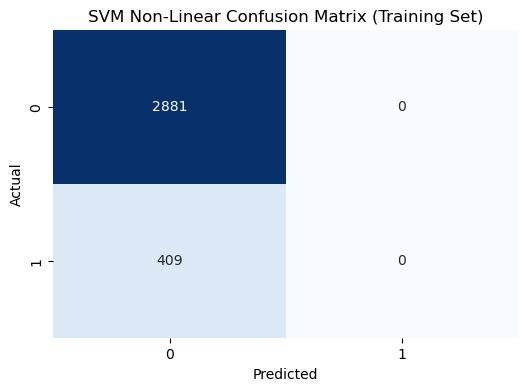

The accuracy of the confusion matrix to follow is  87.24 %


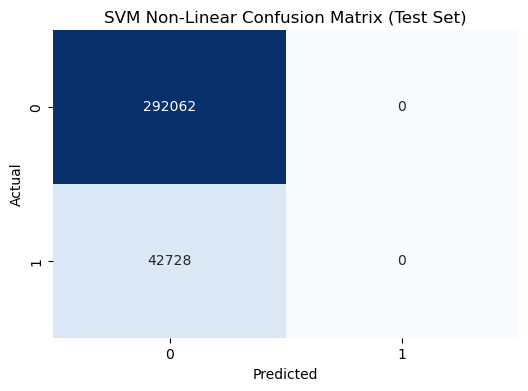

In [77]:
# Plot confusion matrix for training & test data
plot_confusion_matrix(y_train_clean_NLSVM, y_train_NLSVM_2, 'SVM Non-Linear Confusion Matrix (Training Set)')
plot_confusion_matrix(y_test_NLSVM, y_test_NLSVM_2, 'SVM Non-Linear Confusion Matrix (Test Set)')

We find that there is some issue in the output of the matrix has some issues in yielding only True positives and False positives for both cases. This may in fact be a result from the C and gamma tuning yielding innacurate results (ie. all values to be non-hazardous).

In [79]:
print(y_train_NLSVM_2)
print(y_test_NLSVM_2)

[False False False ... False False False]
[False False False ... False False False]


Looking at the resulting data, the tuning parameters do appear to show that the model is only accurate because mose NEO's in general are non-hazardous. Tuning the result differently would likely yield better results, as the linear method has proven to show.

## 2.6 Confusion Matrix

We can see from these confusion matrices that they assort as follows:

[[True & Non-hazardous, False and hazardous],

 [False & Non-hazardous, True and hazardous]]

From these, we can note that a majority of NEO's are non-hazardous to earth, with very few (regardless of size, speed, magnitude) approaching a distance hazardous to the earth.

# 3.0 Conclusions

Based on the Accuracy and confusion matrices presented, we can see that the decision tree methodology holds the higest accuracy compared to the other methods. The SVM methods have potential for a higher accuracy, though tuning them lead to higher processing times. For the Non-Linear SVM model, we found that by limiting the input data has yielded numerous issues in the processing. 

Ultimately, we have succeeded in creating machine learning models to assess NEO's potential hazard to the earth based on relevant data. Though we have found low correlations, numerous outliers, and high processing times, ultimately based on these models we can better predict how safe the earth is from these hazards.